In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
words = stopwords.words("english")
stemmer = SnowballStemmer('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.svm import LinearSVC



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brucedecker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brucedecker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
stopwords_set = set(stopwords.words("english"))
df_listing_detail = pd.read_csv('airbnb-open-data-in-nyc/listings_detail.csv', keep_default_na=False, skip_blank_lines=False, engine='python')
df_listing_detail = df_listing_detail.replace(np.nan, '', regex=True)




In [4]:
df_listing_detail.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,18461891,https://www.airbnb.com/rooms/18461891,20171002002103,2017-10-03,"Bright, comfortable 1B studio near everything!",*Looking to fill these specific dates: June 24...,Very well illuminated space includes comfortab...,*Looking to fill these specific dates: June 24...,none,There are Michelin-rated restaurants in the ar...,...,f,,,f,f,strict,f,f,1,
1,20702398,https://www.airbnb.com/rooms/20702398,20171002002103,2017-10-03,Quiet house on City Island,1 private bedroom and bathroom available for o...,,1 private bedroom and bathroom available for o...,none,This neighborhood is dope! Lot's of seafood re...,...,f,,,f,f,moderate,f,f,1,2
2,6627449,https://www.airbnb.com/rooms/6627449,20171002002103,2017-10-03,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,none,City Island is a unique and a hidden gem of Ne...,...,f,,,f,f,strict,f,f,1,0.77
3,19949243,https://www.airbnb.com/rooms/19949243,20171002002103,2017-10-03,Stay aboard a sailboat,stay aboard a sailboat,,stay aboard a sailboat,none,,...,f,,,t,f,strict,f,f,1,
4,1886820,https://www.airbnb.com/rooms/1886820,20171002002103,2017-10-03,Quaint City Island Community.,Quiet island boating town on Long Island Soun...,"Master bed with queen bed, full bath and offi...",Quiet island boating town on Long Island Soun...,none,Small New England type town in the middle of ...,...,f,,,f,f,strict,f,f,1,


In [5]:
df_listing_detail['NLP'] = df_listing_detail[['name', 'summary', 'space', 'description', 'neighborhood_overview']].apply(lambda x: ' '.join(x), axis=1)
df_listing_detail['NLP'] = df_listing_detail[['NLP', 'notes', 'space', 'transit', 'access']].apply(lambda x: ' '.join(x), axis=1)
df_listing_detail['NLP'] = df_listing_detail[['NLP', 'interaction', 'house_rules', 'transit', 'access']].apply(lambda x: ' '.join(x), axis=1)

In [6]:
df_listing_detail['NLP'].head(10)

0    Bright, comfortable 1B studio near everything!...
1    Quiet house on City Island 1 private bedroom a...
2    Large 1 BDRM in Great location This ground flo...
3    Stay aboard  a sailboat stay aboard a sailboat...
4    Quaint City Island Community.  Quiet island  b...
5    Quaint City Island Home Located in an old sea-...
6    Sweet Getaway Getaway for two (2) or up to sev...
7    City Island Sanctuary BR & Private Bath w Park...
8    Relax and unwind on the water. On City Island ...
9    WATERFRONT STUDIO APARTMENT My place is close ...
Name: NLP, dtype: object

In [7]:
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=6, stop_words='english')
select_features = SelectPercentile(chi2, percentile=9.5)



In [8]:
# Make sure there is no missing values in NLP column
null_columns=df_listing_detail.columns[df_listing_detail.isnull().any()]
df_listing_detail[null_columns].isnull().sum()
print(df_listing_detail[df_listing_detail["NLP"].isnull()][null_columns])

Empty DataFrame
Columns: []
Index: []


In [9]:
all_words = []
print(df_listing_detail["NLP"].shape[0])

44317


In [10]:
words = stopwords.words("english")
stemmer = SnowballStemmer('english')

In [11]:
for i in range(0, df_listing_detail["NLP"].shape[0]):
    
    new_text = re.sub('[^a-zA-Z]', ' ', df_listing_detail["NLP"][i])
    new_text = re.sub(r"<br />", " ", new_text)
    new_text = re.sub(r"   ", " ", new_text) 
    new_text = re.sub(r"  ", " ", new_text)
    new_text = new_text.lower().split()
    #new_text = new_text.split()
    new_text = [stemmer.stem(word) for word in new_text if not word in stopwords_set]
    new_text = ' '.join(new_text)  
    all_words.append(new_text)

In [12]:
all_words[0]

'bright comfort b studio near everyth look fill specif date june june cozi bedroom bathroom studio apart top floor prewar build conveni locat block choic n w station minut ride manhattan cafe restaur wine shop groceri cvs nearbi laundromat around corner beauti riversid astoria park minut walk build well illumin space includ comfort queen bed ac bedroom tv connect web stream common area fulli function kitchen housewar storag space avail look fill specif date june june cozi bedroom bathroom studio apart top floor prewar build conveni locat block choic n w station minut ride manhattan cafe restaur wine shop groceri cvs nearbi laundromat around corner beauti riversid astoria park minut walk build well illumin space includ comfort queen bed ac bedroom tv connect web stream common area fulli function kitchen housewar storag space avail import space suitabl children two window open clear fire escap view pretti state new york law requir guest sit fire escap guest must confirm agre safeti preca

In [13]:
X_NLP = vectorizer.fit_transform(all_words).toarray()

In [14]:
select_features = SelectPercentile(chi2, percentile=30)

In [15]:
from sklearn.preprocessing import Imputer

In [16]:


df_listing_detail['review_scores_rating'] = pd.to_numeric(df_listing_detail['review_scores_rating'],errors='coerce')

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df_listing_detail[['review_scores_rating']])
df_listing_detail['review_scores_rating']=imp.transform(df_listing_detail[['review_scores_rating']]).ravel()
'''
imputed_DF = pd.DataFrame(imp.fit_transform(df.loc[:, 14]))
imputed_DF.columns = df.columns
imputed_DF.index = df.index
'''
y_price = df_listing_detail['review_scores_rating'].astype(np.int64)

In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_NLP, y_price, test_size = 0.25, random_state = 0)

X_train = select_features.fit_transform(X_train, y_train)
X_test = select_features.transform(X_test)
#selected_feature_names = [feature_names[i] for i in ch2.get_support(indices=True)]

clf = LinearSVC(C=1.0, penalty='l1', max_iter=3000,  dual=False)
#clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='weighted'))

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.19873669945308634


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [19]:
print(rms)

7.912968608693331


In [20]:
print(rms ** (1/ 2.0))

2.812999930446734


In [21]:
y_pred

array([ 95, 100, 100, ..., 100,  99,  93])

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [37]:
room_type = df_listing_detail.groupby("room_type")
room_type.describe().head(10)

accommodates                                                \
                       count      mean       std  min  25%  50%  75%   max   
room_type                                                                    
Entire home/apt      22072.0  3.722771  2.086640  1.0  2.0  3.0  4.0  16.0   
Private room         21110.0  1.911606  0.899968  1.0  1.0  2.0  2.0  16.0   
Shared room           1135.0  1.896035  1.517602  1.0  1.0  1.0  2.0  16.0   

                availability_30                 ...      review_scores_rating  \
                          count       mean      ...                       75%   
room_type                                       ...                             
Entire home/apt         22072.0   4.483690      ...                      99.0   
Private room            21110.0   7.078399      ...                      98.0   
Shared room              1135.0  11.700441      ...                      98.0   

                       scrape_id                                        \
                   max     count          mean       std           min   
room_type                                                                
Entire home/apt  100.0   22072.0  2.017100e+13  5.093865  2.017100e+13   
Private room     100.0   21110.0  2.017100e+13  4.918085  2.017100e+13   
Shared room      100.0    1135.0  2.017100e+13  0.605736  2.017100e+13   

                                                                         
                          25%           50%           75%           max  
room_type                                                                
Entire home/apt  2.017100e+13  2.017100e+13  2.017100e+13  2.017100e+13  
Private room     2.017100e+13  2.017100e+13  2.017100e+13  2.017100e+13  
Shared room      2.017100e+13  2.017100e+13  2.017100e+13  2.017100e+13  

[3 rows x 128 columns]

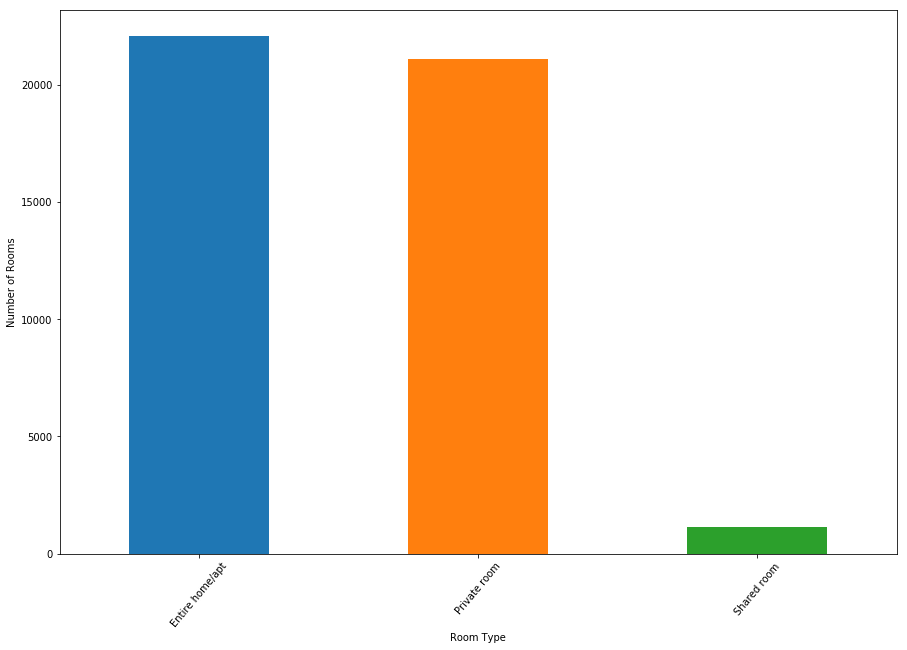

In [41]:
plt.figure(figsize=(15,10))
room_type.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Room Type")
plt.ylabel("Number of Rooms")
plt.show()

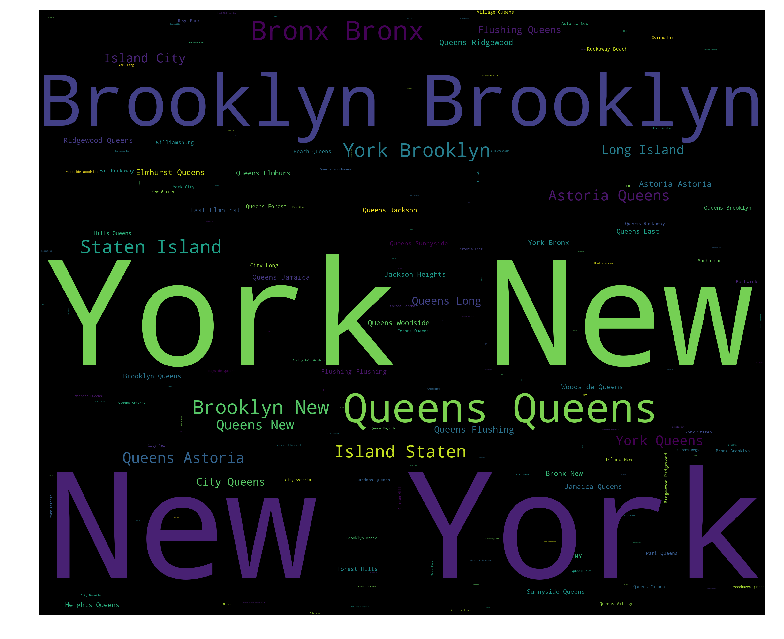

In [51]:
data =  df_listing_detail["city"]
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
wordcloud_draw(data,'black')

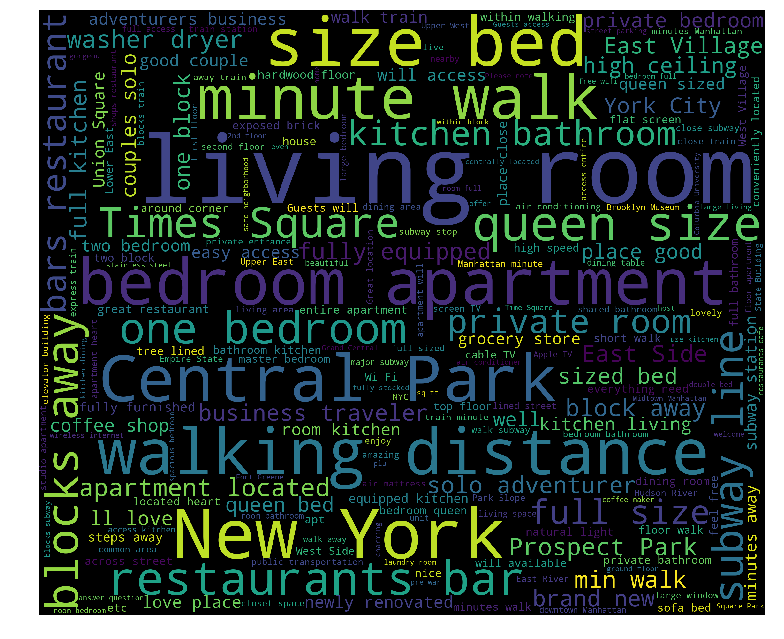

In [52]:
description =  df_listing_detail["description"]
wordcloud_draw(description,'black')